Name: plot_skewt.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 04 July 2023

Purpose: Plot skew-t soundings and hodographs of SRW output

In [166]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotting_functions import read_grib
import metpy.plots as plots
from metpy.units import units
import metpy.calc as mpcalc

Important parameters

In [167]:
# hour of interest
hr = 21
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/"
# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900/postprd/"
# natlev or prslev
nat_prs = "prslev"
# message number for T at isobaric levels in hPa
mn_t = np.array([55, 71, 87, 103, 119, 135, 151, 167, 
        183, 199, 215, 231, 247, 264, 280,
        298, 314, 331, 347, 363, 379, 396,
        412, 428, 444, 462, 478, 494, 510,
        526, 542, 558, 574, 591, 607, 624,
        640, 656, 672, 690, 706, 722, 739,
        757, 772]).astype(int)
# message number for dew point
mn_td = mn_t + 2
# message number for u wind component
mn_u = mn_t + 6
# message number for v wind component
mn_v = mn_t + 7
# pressure value (hPa) that corresponds with mn_t
pres = np.array([2, 5, 7, 10, 20, 30, 50, 70, 
                 100, 125, 150, 175, 
                 200, 225, 250, 275, 
                 300, 325, 350, 375, 
                 400, 425, 450, 475,
                 500, 525, 550, 575,
                 600, 625, 650, 675,
                 700, 725, 750, 775,
                 800, 825, 850, 875,
                 900, 925, 950, 975,
                 1000])

# desired latitude and longitude values
des_lat, des_lon = 34.767158, -97.662778

# directory for figure to be output
figdir = "/scratch2/BMC/fv3lam/Robby.Frost/figures/20230419/skewt/"

Read in temperature

In [168]:
# lists for temperature
Th_all = []
Tr_all = []
# lists for dew point
Tdh_all = []
Tdr_all = []
# lists for u wind
uh_all = []
ur_all = []
# lists for v wind
vh_all = []
vr_all = []

# loop over pressure values
for i in range(mn_t.size):
    # read in temperature
    T_h, lat, lon, valid_date = read_grib(hr, dgrib_h, nat_prs, int(mn_t[i]))
    T_r = read_grib(hr, dgrib_r, nat_prs, int(mn_t[i]), array_only=True)
    # find index nearest to desired 
    lat_idx = np.argmin(np.abs(des_lat - lat[:,0]))
    lon_idx = np.argmin(np.abs(des_lon - lon[0,:]))
    # append to list and specify desired lat/lon
    Th_all.append(T_h.values[lat_idx,lon_idx])
    Tr_all.append(T_r.values[lat_idx,lon_idx])

    # read in dew point
    Td_h = read_grib(hr, dgrib_h, nat_prs, int(mn_td[i]), array_only=True)
    Td_r = read_grib(hr, dgrib_r, nat_prs, int(mn_td[i]), array_only=True)
    # append to list
    Tdh_all.append(Td_h.values[lat_idx,lon_idx])
    Tdr_all.append(Td_r.values[lat_idx,lon_idx])

    # # read in u wind
    # u_h = read_grib(hr, dgrib_h, nat_prs, int(mn_u[i]), array_only=True)
    # u_r = read_grib(hr, dgrib_r, nat_prs, int(mn_u[i]), array_only=True)
    # # append to list
    # uh_all.append(u_h.values[lat_idx,lon_idx])
    # ur_all.append(u_r.values[lat_idx,lon_idx])

    # # read in v wind
    # v_h = read_grib(hr, dgrib_h, nat_prs, int(mn_v[i]), array_only=True)
    # v_r = read_grib(hr, dgrib_r, nat_prs, int(mn_v[i]), array_only=True)
    # # append to list
    # vh_all.append(v_h.values[lat_idx,lon_idx])
    # vr_all.append(v_h.values[lat_idx,lon_idx])

Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/rrfs.t00z.prslev.f021.rrfs_conuscompact_3km.grib2
Finished reading in Temperature
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900/postprd/rrfs.t00z.prslev.f021.rrfs_conuscompact_3km.grib2
Finished reading in Temperature
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/rrfs.t00z.prslev.f021.rrfs_conuscompact_3km.grib2
Finished reading in Dew point temperature
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900/postprd/rrfs.t00z.prslev.f021.rrfs_conuscompact_3km.grib2
Finished reading in Dew point temperature
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_hrrrphys/2023041900/postprd/rrfs.t00z.prslev.f021.rrfs_conuscompact_3km.grib2
Finished reading in Temperature
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041900_3km_rapphys/2023041900

Unit conversions

In [172]:
for i in range(pres.size):
    # convert to celsius
    Th_all[i] = Th_all[i] - 273.15
    Tdh_all[i] = Tdh_all[i] - 273.15

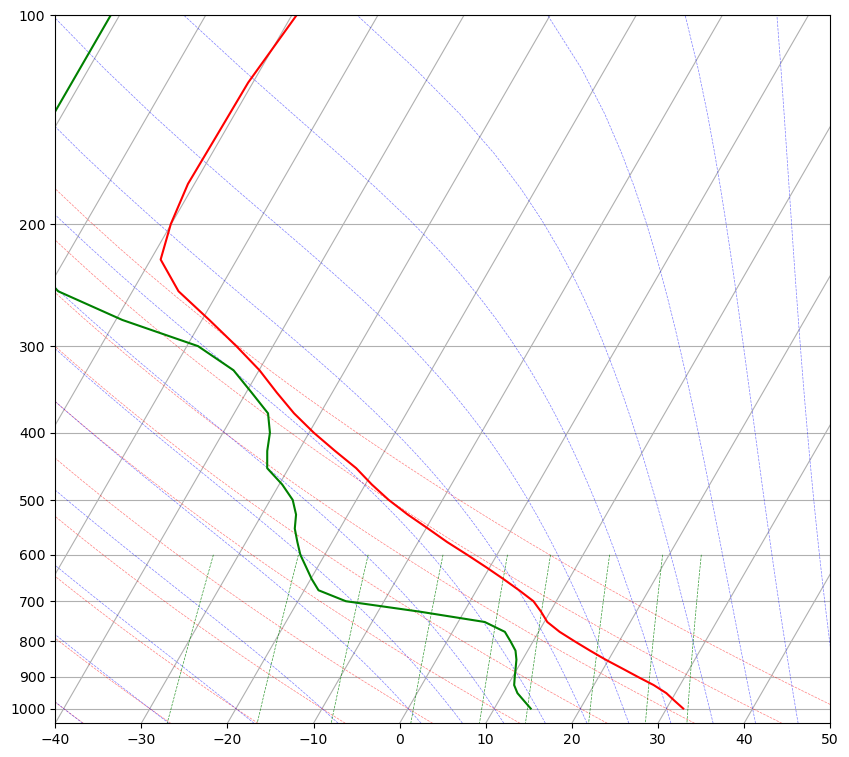

In [181]:
fig = plt.figure(figsize=(10,10))

skew = plots.SkewT(fig)

skew.plot(pres, Th_all, 'red')
skew.plot(pres, Tdh_all, 'green')
skew.plot_dry_adiabats(lw=0.5)
skew.plot_moist_adiabats(lw=0.5)
skew.plot_mixing_lines(lw=0.5)